In [1]:
import os
import pandas as pd 
import numpy as np 
import csv
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# read the PW data from the relevant csv files that I have produced with feynrules
bbgaga = pd.read_csv('atlas_2112p11876_BR_H_to_hh_kc.csv')
bbgaga['mH'] = bbgaga['mH'].astype(float)
bbgaga.head()

,kc,mH,totwidth,h1h1
0,0.050119,251.0,0.099563,0.202922
1,0.067263,251.0,0.129777,0.155679
2,0.090273,251.0,0.184027,0.109786
3,0.121153,251.0,0.281511,0.071768
4,0.162596,251.0,0.456788,0.044230


In [3]:
# extra_tata = pd.read_csv('atlas_extra_2209_BR_H_to_hh_kc.csv')
# extra_tata.head()

In [4]:
bbtata = pd.read_csv('atlas_2209p10910_BR_H_to_hh_kc.csv')
bbtata['mH'] = bbtata['mH'].astype(float)
bbtata.head()

,kc,mH,totwidth,h1h1
0,0.050119,251.0,0.099563,0.202922
1,0.067263,251.0,0.129777,0.155679
2,0.090273,251.0,0.184027,0.109786
3,0.121153,251.0,0.281511,0.071768
4,0.162596,251.0,0.456788,0.044230


In [5]:
# final_tata = pd.concat([bbtata, extra_tata]).reset_index(drop=True)
# final_tata.head()

In [6]:
#final_tata.to_csv('/gpfs/home/argiannakopo/SFV/DownType_csv_PW/Hhh_downtype/tata.csv',index=False)

In [7]:
bbbb = pd.read_csv('atlas_2202p07288_BR_H_to_hh_kc.csv')
bbbb['mH'] = bbbb['mH'].astype(float)
bbbb.head()

,kc,mH,totwidth,h1h1
0,0.050119,1300.0,42.216458,0.729328
1,0.067263,1300.0,42.372970,0.726634
2,0.090273,1300.0,42.653987,0.721847
3,0.121153,1300.0,43.158958,0.713401
4,0.162596,1300.0,44.066902,0.698702


In [8]:
# cmsbbgaga = pd.read_csv('cms_BR_H_to_hh_ks.csv')
# cmsbbgaga['mH'] = cmsbbgaga['mH'].astype(float)
# cmsbbgaga.head()

In [9]:
#Copy the {mh2,kc,xsec} results from MG5 Events directory to a dataframe labeled simres
kc = []
mh2 = []
xs = []
# Specify the directory you want to search
root_directory = '/gpfs/scratch/argiannakopo/H_to_hh_kc_cosbma0p1_xi0_atlas/Events/'

# Use os.walk to iterate through all subdirectories
for root, dirs, files in os.walk(root_directory):
    for subdir in dirs:
        # Print the full path of each subdirectory
        subdirectory_path = os.path.join(root, subdir)
        os.chdir(subdirectory_path)
    # with gzip.open('unweighted_events.lhe.gz', 'rb') as f_in:
    #     with open('unweighted_events.LHE', 'wb') as f_out:
    #         shutil.copyfileobj(f_in, f_out)
        start1 = 0
        start2 = 0
        with open(subdir+'_tag_1_banner.txt', 'r') as csvfile:

            rows = csv.reader(csvfile, skipinitialspace=True, delimiter=' ')
            for row in rows:
                if len(row) > 1:
                    if row[0] == "BLOCK":
                        start1 = 1
                    if start1 == 1:
                        if row[2] == "#" and row[3] == "kc": 
                            kc.append(float(row[1]))
                        if row[0] == "35" and row[3] == "mh2":
                            mh2.append(float(row[1]))
                    if row[1] == "Integrated" and row[2] == "weight":
                        xs.append(float(row[5]))

simres = pd.DataFrame(zip(mh2,kc,xs), columns = ['mh2','kc','xs'])
simres.head()

,mh2,kc,xs
0,1600.0,0.162596,0.002584
1,300.0,0.090273,1.929601
2,290.0,0.030549,0.259711
3,270.0,0.707946,174.930002
4,300.0,0.527500,64.988001


In [10]:
simres['mh2'] = simres['mh2'].round(4)
simres['kc'] = simres['kc'].round(4)
bbgaga['mH'] = bbgaga['mH'].round(4)
bbgaga['kc'] = bbgaga['kc'].round(4)
bbtata['mH'] = bbtata['mH'].round(4)
bbtata['kc'] = bbtata['kc'].round(4)
bbbb['mH'] = bbbb['mH'].round(4)
bbbb['kc'] = bbbb['kc'].round(4)

# cmsbbgaga['mH'] = cmsbbgaga['mH'].round(4)
# cmsbbgaga['kc'] = cmsbbgaga['kc'].round(4)

In [11]:
# NWA: Multiply each row of the simulation results dataframe with the appropriate Br(H -> hh)
def generate_NWA(BrHhh,simres):
    NWA = pd.DataFrame(columns=['mh2', 'kc', 'hh', 'xs'])
    
    for i in range(len(simres)):
        mh2 = simres.at[i, 'mh2']
        kc = simres.at[i, 'kc']
        matching_rows = BrHhh[(BrHhh['mH'] == mh2) & (BrHhh['kc'] == kc)]
        
        if not matching_rows.empty:
            Hhh = matching_rows['h1h1'].values[0].astype(float)
            xsec = simres.at[i, 'xs']
            NWA.loc[i, 'xs'] = Hhh * xsec
            NWA.loc[i, 'mh2'] = mh2
            NWA.loc[i, 'kc'] = kc
            NWA.loc[i, 'hh'] = Hhh
    
    return NWA

In [12]:
NWAgaga = generate_NWA(bbgaga,simres)
NWAtata = generate_NWA(bbtata,simres)
NWAbbbb = generate_NWA(bbbb,simres)
#NWAgaga.head()
NWAbbbb.head()

,mh2,kc,hh,xs
0,1600.0,0.1626,0.713275,0.001843
16,1300.0,0.1212,0.713401,0.003287
27,3000.0,0.0903,0.739321,0.000009
30,2750.0,0.2929,0.715879,0.00017
33,1400.0,0.1626,0.704528,0.003884


In [13]:
## combine NWAbbbb with 2209.p10910 (bbtata channel) to get all the necessary masses
temp = NWAtata[NWAtata['mh2'] < min(pd.unique(NWAbbbb['mh2'].sort_values()))]
NWAbb = pd.concat([NWAbbbb,temp]).reset_index(drop=True)
NWAbb.head()


,mh2,kc,hh,xs
0,1600.0,0.1626,0.713275,0.001843
1,1300.0,0.1212,0.713401,0.003287
2,3000.0,0.0903,0.739321,0.000009
3,2750.0,0.2929,0.715879,0.00017
4,1400.0,0.1626,0.704528,0.003884


In [14]:
NWAgaga = NWAgaga[NWAgaga['xs'] != 0 ].reset_index(drop=True)
# NWAgaga.head()
NWAtata = NWAtata[NWAtata['xs'] != 0 ].reset_index(drop=True)
# NWAtata.head()
NWAbb = NWAbb[NWAbb['xs'] != 0].reset_index(drop=True)
NWAbb.head()


,mh2,kc,hh,xs
0,1600.0,0.1626,0.713275,0.001843
1,1300.0,0.1212,0.713401,0.003287
2,3000.0,0.0903,0.739321,0.000009
3,2750.0,0.2929,0.715879,0.00017
4,1400.0,0.1626,0.704528,0.003884


In [15]:
# Load the experimental bounds to compare with my results 

ATLASgaga = pd.read_csv('/gpfs/home/argiannakopo/SFV/Exp_data/X-hh-ATLAS-2112p11876.csv')
ATLASgaga.head()


,m,xsec-fb
0,251.0,388.084
1,260.0,639.573
2,270.0,595.337
3,280.0,346.985
4,290.0,243.617


In [16]:
ATLAStata = pd.read_csv('/gpfs/home/argiannakopo/SFV/Exp_data/X-hh-ATLAS-2209p10910.csv')
ATLAStata.head()

,m,xsec-fb
0,251,638.439473
1,260,896.941143
2,280,486.649359
3,300,536.855730
4,325,335.203790


In [17]:
ATLASbb = pd.read_csv('/gpfs/home/argiannakopo/SFV/Exp_data/X-hh-ATLAS-2202p07288.csv')
ATLASbb.head()

,m,xsec-fb
0,251,3740.014623
1,260,8413.666185
2,280,7741.787588
3,300,3479.437441
4,350,389.695991


In [18]:
## Convert to picobarn

ATLASgaga['xs'] = ATLASgaga['xsec-fb'].apply(lambda x: x * 0.001)
ATLASgaga.head()
ATLAStata['xs'] = ATLAStata['xsec-fb'].apply(lambda x: x * 0.001)
ATLAStata.head()

,m,xsec-fb,xs
0,251,638.439473,0.638439
1,260,896.941143,0.896941
2,280,486.649359,0.486649
3,300,536.855730,0.536856
4,325,335.203790,0.335204


In [19]:
ATLASbb['xs'] = ATLASbb['xsec-fb'].apply(lambda x: x * 0.001)
ATLASbb.head()

,m,xsec-fb,xs
0,251,3740.014623,3.740015
1,260,8413.666185,8.413666
2,280,7741.787588,7.741788
3,300,3479.437441,3.479437
4,350,389.695991,0.389696


In [20]:
def process_atlas(atlas_df, nwa_df,plot_mass):
    data_rows = []

    final_bound = pd.DataFrame(columns=['m', 'kc', 'Exp-xsec'])

    for m in atlas_df['m']:
        chunk = pd.DataFrame(columns=['mh2', 'kc', 'xs'])

        for i in range(len(nwa_df)):
            if m == nwa_df.loc[i, 'mh2']:
                chunk.loc[len(chunk.index)] = nwa_df.loc[i]

        row = atlas_df.loc[atlas_df['m'] == m, 'xs']

        if not row.empty:
            comp = row.values[0].astype(float)

        sorted_chunk = chunk.sort_values('xs')
        sorted_chunk['kc'] = pd.to_numeric(sorted_chunk['kc'], errors='coerce')
        sorted_chunk['xs'] = pd.to_numeric(sorted_chunk['xs'], errors='coerce')

        if len(sorted_chunk) > 0:
            kc_interp = np.interp(comp, sorted_chunk['xs'], sorted_chunk['kc'])
            data_rows.append([m, float(kc_interp), float(comp)])
            
        if m == plot_mass:
            chunk1 = chunk.sort_values('kc')
            chunk1['kc'] = pd.to_numeric(chunk1['kc'], errors='coerce')
            chunk1['xs'] = pd.to_numeric(chunk1['xs'], errors='coerce')
            plt.axhline(y=comp, color='r', linestyle='-', label=f'ATLAS bound for m={plot_mass}GeV')
            plt.axvline(x=kc_interp, color='green',label='interpolated kc value')
            ax = plt.gca()
            ax.plot(chunk1['kc'],chunk1['xs'], marker='.', markersize='5',color='C0')
            ax.set_xlabel('kc', fontsize=18)
            ax.set_ylabel('cross section (pb)',fontsize=18)
            plt.grid()
            ax.set_yscale('log')
            ax.set_xscale('log')
            ax.legend()
            plt.show()
    final_bound = pd.DataFrame(data_rows, columns=['m','kc','Exp-xsec'])
    return final_bound


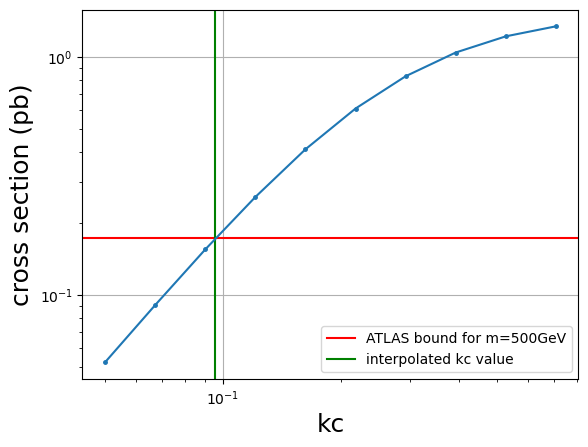

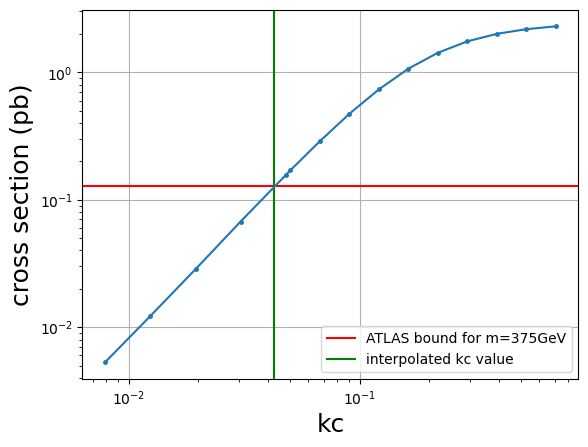

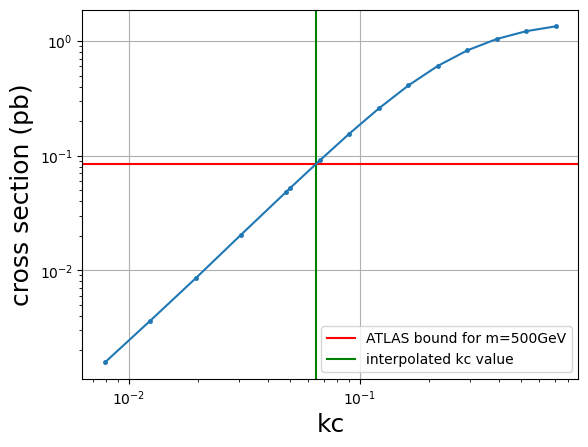

In [21]:
# Process ATLASgaga and NWAgaga
final_bound_gaga = process_atlas(ATLASgaga, NWAgaga, 500)

# Process ATLAStata and NWAtata
final_bound_tata = process_atlas(ATLAStata, NWAtata, 375)

# Process ATLASbb and NWAbb
final_bound_bb = process_atlas(ATLASbb , NWAbb, 500)


### Plotting bound

In [22]:
## Make sure that the interpolation process has worked correctly before plotting. 
def remove_failed_interpolation(final_bound,NWA):
    m_to_remove = []
    
    for m in final_bound['m']:
        mass_chunk = NWA[NWA['mh2'] == m]
        min_xs = mass_chunk['xs'].min()
        max_xs = mass_chunk['xs'].max()
        
        if float(final_bound[final_bound['m']== m ]['Exp-xsec']) > max_xs or float(final_bound[final_bound['m'] == m]['Exp-xsec']) < min_xs:
            m_to_remove.append(m)
            
    final_bound = final_bound[~final_bound['m'].isin(m_to_remove)]
    
    return final_bound

In [23]:
## Making sure the interpolation has worked correctly 

final_bound_gaga = remove_failed_interpolation(final_bound_gaga, NWAgaga)
final_bound_tata = remove_failed_interpolation(final_bound_tata, NWAtata)
final_bound_bb = remove_failed_interpolation(final_bound_bb, NWAbb)

In [24]:
### Import the bound with the old ATLAS results (36 fb^-1)

old_kc = pd.read_csv('/gpfs/home/argiannakopo/SFV/DownType_csv_PW/kc_files/kc_xs_interpolation_cosbma_0p1.csv',usecols=['m','kc','ATLASxsec'])
old_kc = old_kc[old_kc['m'] < 2000]
old_kc.head()

,m,kc,ATLASxsec
0,260,0.083393,0.850952
1,275,0.069743,0.739451
2,280,0.078108,0.845705
3,300,0.087601,0.868820
4,325,0.075426,0.564852


Text(1100, 0.005, '$\\xi=0$\n$\\cos( \\beta- \\alpha)=0.1$')

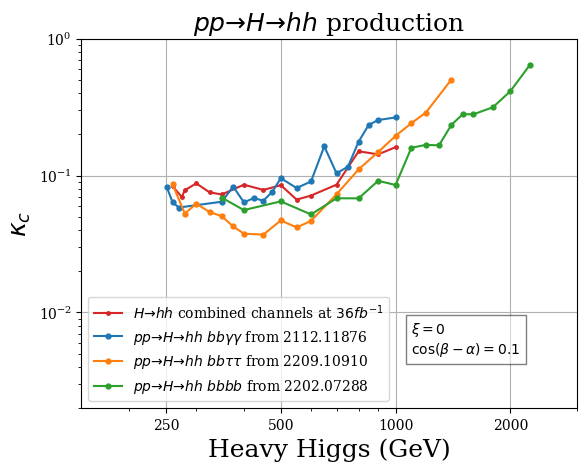

In [25]:
os.chdir('/gpfs/home/argiannakopo/SFV/DownType_csv_PW/Hhh_downtype')
#Plot the mass Vs kc
matplotlib.rcParams['font.family']='serif'
#matplotlib.rcParams['text.usetex'] = True
ax = plt.gca()
ax.plot(old_kc['m'], old_kc['kc'], marker='.', markersize='5', color='C3', label= r'$H \to hh$ combined channels at $36fb^{-1}$')
ax.plot(final_bound_gaga['m'],final_bound_gaga['kc'], marker='.', markersize='7',color='C0', label=r'$pp \to H \to hh$ $bb\gamma \gamma$ from 2112.11876')#, label='H -> hh') #, c = 'blue')
ax.plot(final_bound_tata['m'],final_bound_tata['kc'], marker='.', markersize='7',color='C1', label=r'$pp \to H \to hh$ $bb\tau \tau$ from 2209.10910')#, label='H -> hh') #, c = 'blue')
ax.plot(final_bound_bb['m'],final_bound_bb['kc'], marker='.', markersize='7',color='C2', label=r'$pp \to H \to hh$ $bbbb$ from 2202.07288')#, label='H -> hh') #, c = 'blue')
ax.set_yscale('log')
ax.set_xscale('log')
plt.axis([150,3000,0.002,1])
#ax.set_xlim(200,3000)
#ax.set_ylim(0.05,1.5)
ax.set_xticks([250,500,1000,2000], labels=[250,500,1000,2000])
#ax.set_ytickc([0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5], labels=[0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5])
ax.set_xlabel('Heavy Higgs (GeV)', fontsize=18)
ax.set_ylabel('$\kappa_c$',fontsize=18)
#plt.axvline(x=300)
plt.grid()
#plt.ylim([0.0018,1])
plt.legend()
plt.title(r'$pp \to H \to hh$ production ', fontsize=18)

text2 = r'$\xi=0$'
text4 = r'$\cos( \beta- \alpha)=0.1$'

text =  text2 +'\n'+ text4 
plt.text(1100, 5*10**(-3), text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
# os.chdir('gpfs/home/argiannakopo/SFV/UpType_csv_PW/AZh,uptype')
# plt.savefig("AZh_channel_up_kc.pdf", format="pdf", bbox_inches="tight")

## Combine channels so that I get the stricter bound for each individual mass

In [26]:
### Combine the channels so that I get the stricter bound for each given mass

temp_gaga = final_bound_gaga[final_bound_gaga['m'] <= 275]
temp_tata = final_bound_tata[(final_bound_tata['m'] > 275) & (final_bound_tata['m'] < 700)]
temp_bb = final_bound_bb[final_bound_bb['m'] >= 700]

new_final_bound = pd.concat([temp_gaga, temp_tata , temp_bb])
new_final_bound.head()



,m,kc,Exp-xsec
0,251.0,0.082600,0.388084
1,260.0,0.063839,0.639573
2,270.0,0.058380,0.595337
2,280.0,0.052781,0.486649
3,300.0,0.062193,0.536856


Text(1100, 0.005, '$\\xi=0$\n$\\cos( \\beta- \\alpha)=0.1$')

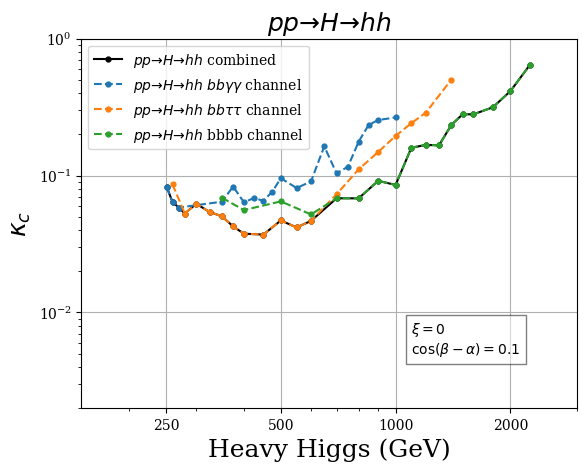

In [27]:
#Plot the mass Vs kc
matplotlib.rcParams['font.family']='serif'
#matplotlib.rcParams['text.usetex'] = True
ax = plt.gca()
ax.plot(new_final_bound['m'],new_final_bound['kc'], marker='.',linestyle='solid', markersize='7',color='black', label=r'$pp \to H \to hh$ combined ')#, label='H -> hh') #, c = 'blue')
ax.plot(final_bound_gaga['m'],final_bound_gaga['kc'], marker='.',linestyle='dashed', markersize='7',color='C0', label=r'$pp \to H \to hh$ $bb \gamma \gamma$ channel ')#, label='H -> hh') #, c = 'blue')
ax.plot(final_bound_tata['m'],final_bound_tata['kc'], marker='.',linestyle='dashed',markersize='7',color='C1', label=r'$pp \to H \to hh$ $bb \tau \tau$ channel')#, l
ax.plot(final_bound_bb['m'],final_bound_bb['kc'], marker='.',linestyle='dashed',markersize='7',color='C2', label=r'$pp \to H \to hh$ bbbb channel')#, l
ax.set_yscale('log')
ax.set_xscale('log')
plt.axis([150,3000,0.002,1])
#ax.set_xlim(200,3000)
#ax.set_ylim(0.05,1.5)
ax.set_xticks([250,500,1000,2000], labels=[250,500,1000,2000])
#ax.set_ytickc([0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5], labels=[0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5])
ax.set_xlabel('Heavy Higgs (GeV)', fontsize=18)
ax.set_ylabel('$\kappa_c$',fontsize=18)
# plt.axvline(x=275,color='red')
# plt.axvline(x=350)
#plt.axhline(y=0.641)
plt.grid()
#plt.ylim([0.0018,1])
plt.legend()
plt.title(r'$pp \to H \to hh$', fontsize=18)

text2 = r'$\xi=0$'
text4 = r'$\cos( \beta- \alpha)=0.1$'

text =  text2 +'\n'+ text4 
plt.text(1100, 5*10**(-3), text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
# os.chdir('gpfs/home/argiannakopo/SFV/UpType_csv_PW/AZh,uptype')
# plt.savefig("AZh_channel_up_kc.pdf", format="pdf", bbox_inches="tight")

In [ ]:
## Export bound
#new_final_bound.to_csv('/gpfs/home/argiannakopo/SFV/DownType_csv_PW/kc_cosbma0p1_bound_files/Hhh_kc_xi0_cosbma0p1_updated.csv')

# Repeat the process using the expected values range from the experiment and compare the differences

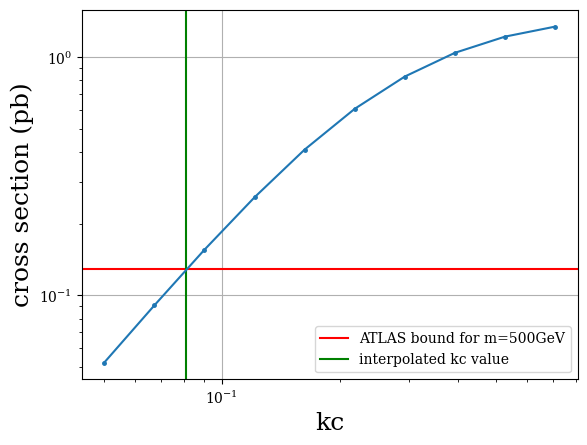

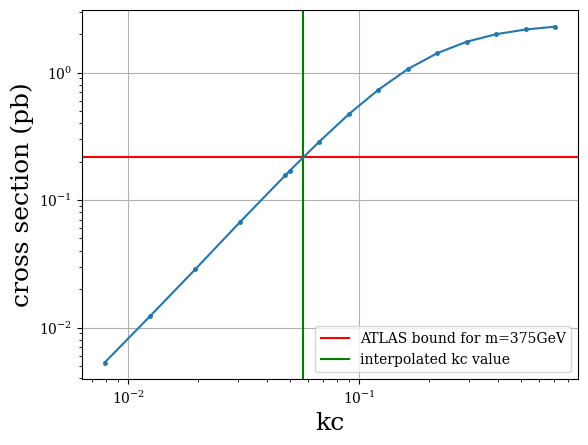

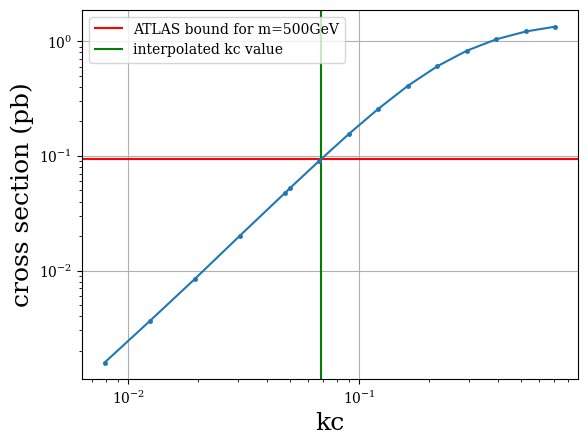

In [28]:
atlas_exp_bbgaga = pd.read_csv('/gpfs/home/argiannakopo/SFV/Exp_data/X-hh-ATLAS-2112p11876-Expected.csv')
atlas_exp_bbtata = pd.read_csv('/gpfs/home/argiannakopo/SFV/Exp_data/X-hh-ATLAS-2209p10910-Expected.csv')
atlas_exp_bbbb = pd.read_csv('/gpfs/home/argiannakopo/SFV/Exp_data/X-hh-ATLAS-2202p07288-Expected.csv')
atlas_exp_bbgaga['xs'] = atlas_exp_bbgaga['xsec-fb'].apply(lambda x: x * 0.001)
atlas_exp_bbtata['xs'] = atlas_exp_bbtata['xsec-fb'].apply(lambda x: x * 0.001)
atlas_exp_bbbb['xs'] = atlas_exp_bbbb['xsec-fb'].apply(lambda x: x * 0.001)


# Process ATLASgaga and NWAgaga
final_bound_exp_gaga = process_atlas(atlas_exp_bbgaga, NWAgaga, 500)

# Process ATLAStata and NWAtata
final_bound_exp_tata = process_atlas(atlas_exp_bbtata, NWAtata, 375)

# Process ATLASbb and NWAbb
final_bound_exp_bb = process_atlas(atlas_exp_bbbb , NWAbb, 500)


In [30]:
## Making sure the interpolation has worked correctly 

final_bound__exp_gaga = remove_failed_interpolation(final_bound_exp_gaga, NWAgaga)
final_bound_exp_tata = remove_failed_interpolation(final_bound_exp_tata, NWAtata)
final_bound_exp_bb = remove_failed_interpolation(final_bound_exp_bb, NWAbb)

Text(1100, 0.005, '$\\xi=0$\n$\\cos( \\beta- \\alpha)=0.1$')

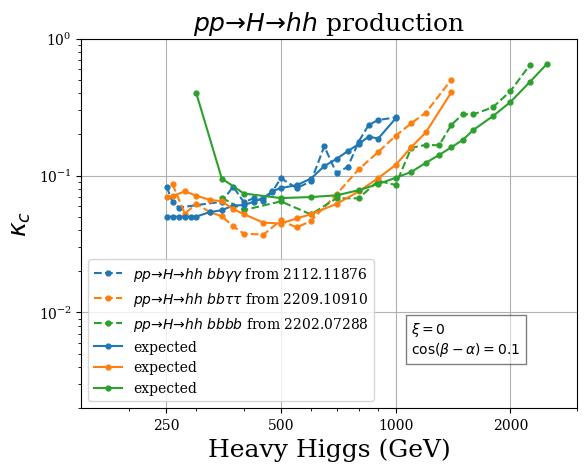

In [31]:
## Plot everything together and see how much different the bounds are when I use expected Vs observed 
os.chdir('/gpfs/home/argiannakopo/SFV/DownType_csv_PW/Hhh_downtype')
#Plot the mass Vs kc
matplotlib.rcParams['font.family']='serif'
#matplotlib.rcParams['text.usetex'] = True
ax = plt.gca()

ax.plot(final_bound_gaga['m'],final_bound_gaga['kc'], marker='.',linestyle='--', markersize='7',color='C0', label=r'$pp \to H \to hh$ $bb\gamma \gamma$ from 2112.11876')
ax.plot(final_bound_tata['m'],final_bound_tata['kc'], marker='.', linestyle='--', markersize='7',color='C1', label=r'$pp \to H \to hh$ $bb\tau \tau$ from 2209.10910')
ax.plot(final_bound_bb['m'],final_bound_bb['kc'], marker='.', linestyle='--', markersize='7',color='C2', label=r'$pp \to H \to hh$ $bbbb$ from 2202.07288')

ax.plot(final_bound_exp_gaga['m'],final_bound_exp_gaga['kc'], marker='.', markersize='7',color='C0', label=r'expected')
ax.plot(final_bound_exp_tata['m'],final_bound_exp_tata['kc'], marker='.', markersize='7',color='C1', label=r'expected')
ax.plot(final_bound_exp_bb['m'],final_bound_exp_bb['kc'], marker='.',  markersize='7',color='C2', label=r'expected')

ax.set_yscale('log')
ax.set_xscale('log')
plt.axis([150,3000,0.002,1])
#ax.set_xlim(200,3000)
#ax.set_ylim(0.05,1.5)
ax.set_xticks([250,500,1000,2000], labels=[250,500,1000,2000])
#ax.set_ytickc([0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5], labels=[0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5])
ax.set_xlabel('Heavy Higgs (GeV)', fontsize=18)
ax.set_ylabel('$\kappa_c$',fontsize=18)
#plt.axvline(x=300)
plt.grid()
#plt.ylim([0.0018,1])
plt.legend()
plt.title(r'$pp \to H \to hh$ production ', fontsize=18)

text2 = r'$\xi=0$'
text4 = r'$\cos( \beta- \alpha)=0.1$'

text =  text2 +'\n'+ text4 
plt.text(1100, 5*10**(-3), text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
# os.chdir('gpfs/home/argiannakopo/SFV/UpType_csv_PW/AZh,uptype')
# plt.savefig("AZh_channel_up_kc.pdf", format="pdf", bbox_inches="tight")

# 3/ab projections for HL-LHC

In [32]:
def make_copy(original,rescaled,scale_factor):
    rescaled = original.copy(deep=True)
    rescaled['xs'] = rescaled['xs'].div(scale_factor)
    return rescaled
    

In [33]:
HLLHC_factor = (3-0.139)**0.25
ATLASbb_rescaled = pd.DataFrame()
ATLASbb_rescaled = make_copy(ATLASbb,ATLASbb_rescaled,HLLHC_factor)
ATLASgaga_rescaled = pd.DataFrame()
ATLASgaga_rescaled = make_copy(ATLASgaga,ATLASgaga_rescaled,HLLHC_factor)
ATLAStata_rescaled = pd.DataFrame()
ATLAStata_rescaled = make_copy(ATLAStata,ATLAStata_rescaled,HLLHC_factor)

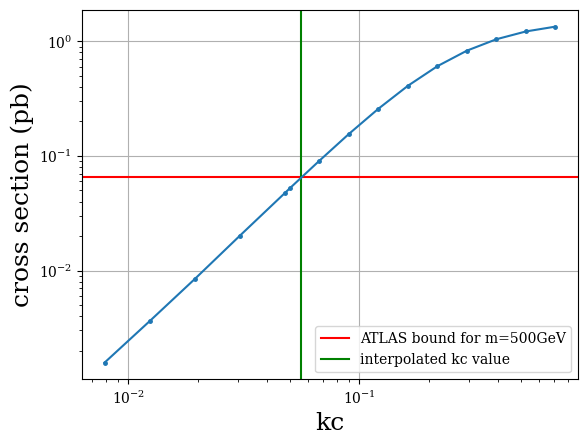

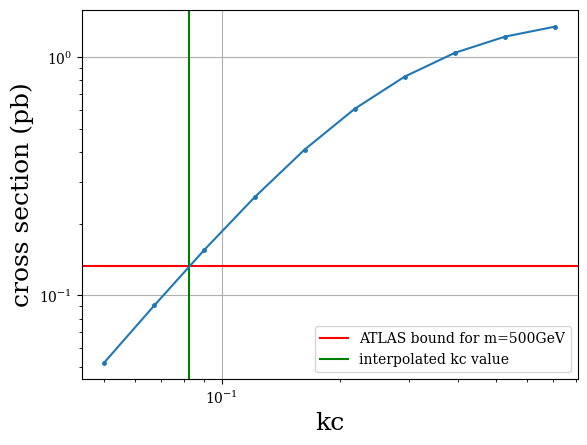

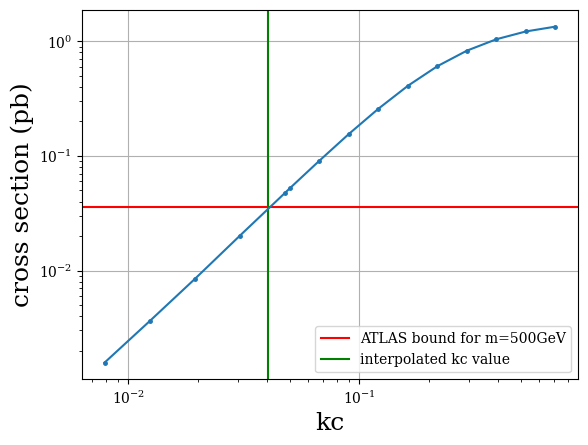

In [34]:
rescaled_bb = process_atlas(ATLASbb_rescaled,NWAbb,500)
rescaled_gaga = process_atlas(ATLASgaga_rescaled,NWAgaga,500)
rescaled_tata = process_atlas(ATLAStata_rescaled,NWAtata,500)

In [35]:
rescaled_bb = remove_failed_interpolation(rescaled_bb,NWAbb)
rescaled_gaga = remove_failed_interpolation(rescaled_gaga,NWAgaga)
rescaled_tata = remove_failed_interpolation(rescaled_tata,NWAtata)

Text(1100, 0.005, '$\\xi=0$\n$\\cos( \\beta- \\alpha)=0.1$')

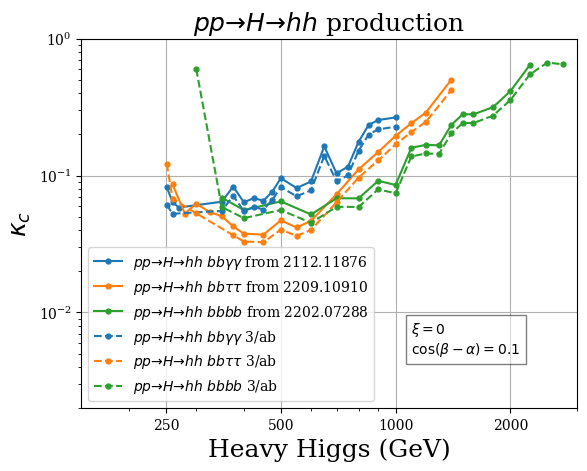

In [36]:
os.chdir('/gpfs/home/argiannakopo/SFV/DownType_csv_PW/Hhh_downtype')
#Plot the mass Vs kc
matplotlib.rcParams['font.family']='serif'
#matplotlib.rcParams['text.usetex'] = True
ax = plt.gca()
ax.plot(final_bound_gaga['m'],final_bound_gaga['kc'], marker='.', markersize='7',color='C0', label=r'$pp \to H \to hh$ $bb\gamma \gamma$ from 2112.11876')#, label='H -> hh') #, c = 'blue')
ax.plot(final_bound_tata['m'],final_bound_tata['kc'], marker='.', markersize='7',color='C1', label=r'$pp \to H \to hh$ $bb\tau \tau$ from 2209.10910')#, label='H -> hh') #, c = 'blue')
ax.plot(final_bound_bb['m'],final_bound_bb['kc'], marker='.', markersize='7',color='C2', label=r'$pp \to H \to hh$ $bbbb$ from 2202.07288')#, label='H -> hh') #, c = 'blue')

ax.plot(rescaled_gaga['m'],rescaled_gaga['kc'], marker='.',linestyle='--', markersize='7',color='C0', label=r'$pp \to H \to hh$ $bb\gamma \gamma$ 3/ab')#, label='H -> hh') #, c = 'blue')
ax.plot(rescaled_tata['m'],rescaled_tata['kc'], marker='.',linestyle='--', markersize='7',color='C1', label=r'$pp \to H \to hh$ $bb\tau \tau$ 3/ab')#, label='H -> hh') #, c = 'blue')
ax.plot(rescaled_bb['m'],rescaled_bb['kc'], marker='.',linestyle='--' ,markersize='7',color='C2', label=r'$pp \to H \to hh$ $bbbb$ 3/ab')#, label='H -> hh') #, c = 'blue')

ax.set_yscale('log')
ax.set_xscale('log')
plt.axis([150,3000,0.002,1])
#ax.set_xlim(200,3000)
#ax.set_ylim(0.05,1.5)
ax.set_xticks([250,500,1000,2000], labels=[250,500,1000,2000])
#ax.set_ytickc([0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5], labels=[0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5])
ax.set_xlabel('Heavy Higgs (GeV)', fontsize=18)
ax.set_ylabel('$\kappa_c$',fontsize=18)
#plt.axvline(x=300)
plt.grid()
#plt.ylim([0.0018,1])
plt.legend()
plt.title(r'$pp \to H \to hh$ production ', fontsize=18)

text2 = r'$\xi=0$'
text4 = r'$\cos( \beta- \alpha)=0.1$'

text =  text2 +'\n'+ text4 
plt.text(1100, 5*10**(-3), text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
# os.chdir('gpfs/home/argiannakopo/SFV/UpType_csv_PW/AZh,uptype')
# plt.savefig("AZh_channel_up_kc.pdf", format="pdf", bbox_inches="tight")

### Combine different channels for the stricter bound at 3/ab

In [33]:
### Combine the channels so that I get the stricter bound for each given mass

temp_rescaled_gaga = rescaled_gaga[rescaled_gaga['m'] <= 275]
temp_rescaled_tata = rescaled_tata[(rescaled_tata['m'] > 275) & (final_bound_tata['m'] < 700)]
temp_rescaled_bb = rescaled_bb[rescaled_bb['m'] >= 700]

new_rescaled_final_bound = pd.concat([temp_rescaled_gaga, temp_rescaled_tata , temp_rescaled_bb])
new_rescaled_final_bound.head()



/tmp/ipykernel_9111/183308674.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_rescaled_tata = rescaled_tata[(rescaled_tata['m'] > 275) & (final_bound_tata['m'] < 700)]


,m,kc,Exp-xsec
0,251.0,0.061189,0.298398
1,260.0,0.052567,0.491768
3,300.0,0.052970,0.412789
6,375.0,0.036657,0.098787
7,400.0,0.032969,0.061312


Text(1100, 0.005, '$\\xi=0$\n$\\cos( \\beta- \\alpha)=0.1$')

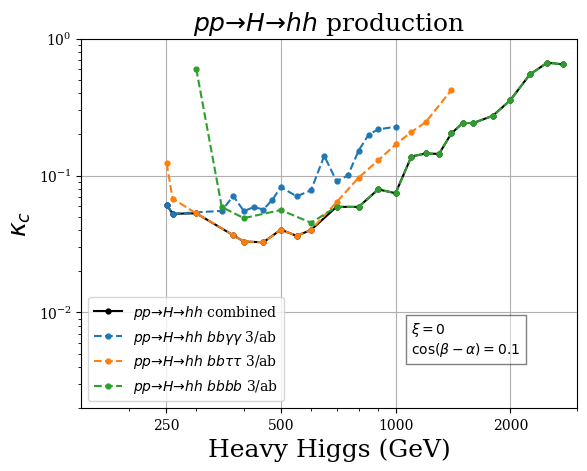

In [34]:
os.chdir('/gpfs/home/argiannakopo/SFV/DownType_csv_PW/Hhh_downtype')
#Plot the mass Vs kc
matplotlib.rcParams['font.family']='serif'
#matplotlib.rcParams['text.usetex'] = True
ax = plt.gca()

ax.plot(new_rescaled_final_bound['m'],new_rescaled_final_bound['kc'], marker='.',linestyle='solid', markersize='7',color='black', label=r'$pp \to H \to hh$ combined ')#, label='H -> hh') #, c = 'blue')

ax.plot(rescaled_gaga['m'],rescaled_gaga['kc'], marker='.',linestyle='--', markersize='7',color='C0', label=r'$pp \to H \to hh$ $bb\gamma \gamma$ 3/ab')#, label='H -> hh') #, c = 'blue')
ax.plot(rescaled_tata['m'],rescaled_tata['kc'], marker='.',linestyle='--', markersize='7',color='C1', label=r'$pp \to H \to hh$ $bb\tau \tau$ 3/ab')#, label='H -> hh') #, c = 'blue')
ax.plot(rescaled_bb['m'],rescaled_bb['kc'], marker='.',linestyle='--' ,markersize='7',color='C2', label=r'$pp \to H \to hh$ $bbbb$ 3/ab')#, label='H -> hh') #, c = 'blue')

ax.set_yscale('log')
ax.set_xscale('log')
plt.axis([150,3000,0.002,1])
#ax.set_xlim(200,3000)
#ax.set_ylim(0.05,1.5)
ax.set_xticks([250,500,1000,2000], labels=[250,500,1000,2000])
#ax.set_ytickc([0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5], labels=[0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5])
ax.set_xlabel('Heavy Higgs (GeV)', fontsize=18)
ax.set_ylabel('$\kappa_c$',fontsize=18)
#plt.axvline(x=300)
plt.grid()
#plt.ylim([0.0018,1])
plt.legend()
plt.title(r'$pp \to H \to hh$ production ', fontsize=18)

text2 = r'$\xi=0$'
text4 = r'$\cos( \beta- \alpha)=0.1$'

text =  text2 +'\n'+ text4 
plt.text(1100, 5*10**(-3), text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
# os.chdir('gpfs/home/argiannakopo/SFV/UpType_csv_PW/AZh,uptype')
# plt.savefig("AZh_channel_up_kc.pdf", format="pdf", bbox_inches="tight")

In [36]:
#Export bound for 3/ab

#new_rescaled_final_bound.to_csv('/gpfs/home/argiannakopo/SFV/DownType_csv_PW/kc_cosbma0p1_bound_files/Hhh_combined_HLLHC_projection.csv')

### Compare at different integrated luminisities

Text(1100, 0.005, '$\\xi=0$\n$\\cos( \\beta- \\alpha)=0.1$')

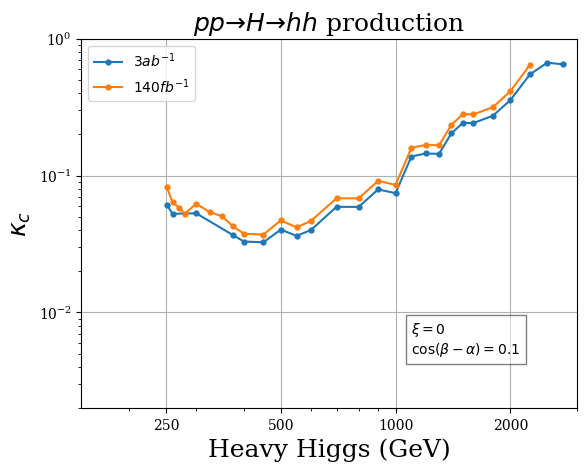

In [35]:
os.chdir('/gpfs/home/argiannakopo/SFV/DownType_csv_PW/Hhh_downtype')
#Plot the mass Vs kc
matplotlib.rcParams['font.family']='serif'
#matplotlib.rcParams['text.usetex'] = True
ax = plt.gca()

ax.plot(new_rescaled_final_bound['m'],new_rescaled_final_bound['kc'], marker='.',linestyle='solid', markersize='7',color='C0', label=r'$3ab^{-1}$')#, label='H -> hh') #, c = 'blue')
ax.plot(new_final_bound['m'],new_final_bound['kc'], marker='.',linestyle='solid', markersize='7',color='C1', label=r'$140fb^{-1}$')#, label='H -> hh') #, c = 'blue')

ax.set_yscale('log')
ax.set_xscale('log')
plt.axis([150,3000,0.002,1])
#ax.set_xlim(200,3000)
#ax.set_ylim(0.05,1.5)
ax.set_xticks([250,500,1000,2000], labels=[250,500,1000,2000])
#ax.set_ytickc([0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5], labels=[0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5])
ax.set_xlabel('Heavy Higgs (GeV)', fontsize=18)
ax.set_ylabel('$\kappa_c$',fontsize=18)
#plt.axvline(x=300)
plt.grid()
#plt.ylim([0.0018,1])
plt.legend()
plt.title(r'$pp \to H \to hh$ production ', fontsize=18)

text2 = r'$\xi=0$'
text4 = r'$\cos( \beta- \alpha)=0.1$'

text =  text2 +'\n'+ text4 
plt.text(1100, 5*10**(-3), text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
# os.chdir('gpfs/home/argiannakopo/SFV/UpType_csv_PW/AZh,uptype')
# plt.savefig("AZh_channel_up_kc.pdf", format="pdf", bbox_inches="tight")

# Use the expected values to rescale and compare with the previous results

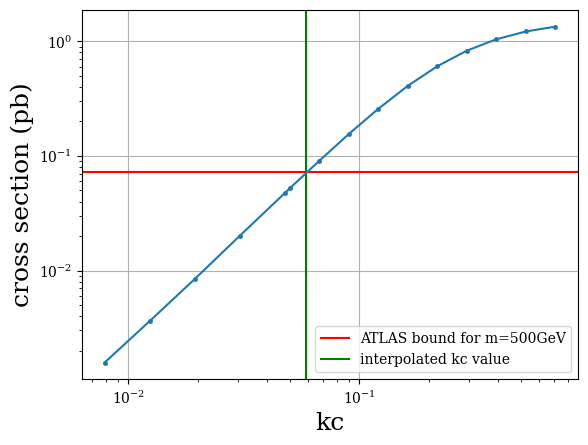

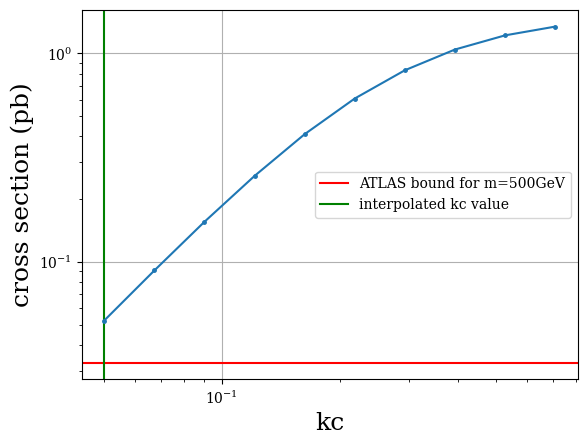

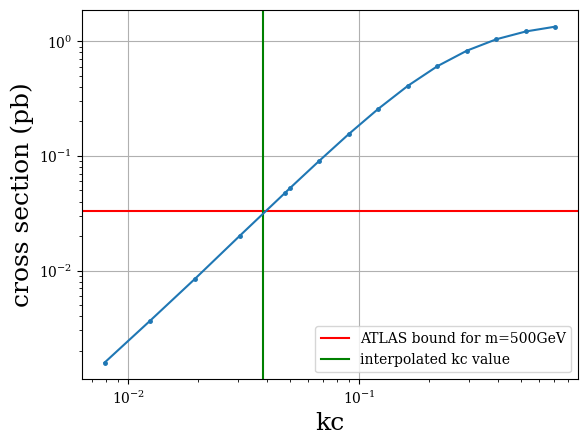

In [38]:
HLLHC_factor = (3-0.139)**0.25
atlasbb_exp_rescaled = pd.DataFrame()
atlasbb_exp_rescaled = make_copy(atlas_exp_bbbb,atlasbb_exp_rescaled,HLLHC_factor)

atlasgaga_exp_rescaled = pd.DataFrame()
atlasgaga_exp_rescaled = make_copy(atlas_exp_bbtata,atlasgaga_exp_rescaled,HLLHC_factor)

atlastata_exp_rescaled = pd.DataFrame()
atlastata_exp_rescaled = make_copy(atlas_exp_bbtata,atlastata_exp_rescaled,HLLHC_factor)

exp_rescaled_bb = process_atlas(atlasbb_exp_rescaled,NWAbb,500)
exp_rescaled_gaga = process_atlas(atlasgaga_exp_rescaled,NWAgaga,500)
exp_rescaled_tata = process_atlas(atlastata_exp_rescaled,NWAtata,500)

exp_rescaled_bb = remove_failed_interpolation(exp_rescaled_bb,NWAbb)
exp_rescaled_gaga = remove_failed_interpolation(exp_rescaled_gaga,NWAgaga)
exp_rescaled_tata = remove_failed_interpolation(exp_rescaled_tata,NWAtata)


Text(1100, 0.003, '$\\xi=0$\n$\\cos( \\beta- \\alpha)=0.1$')

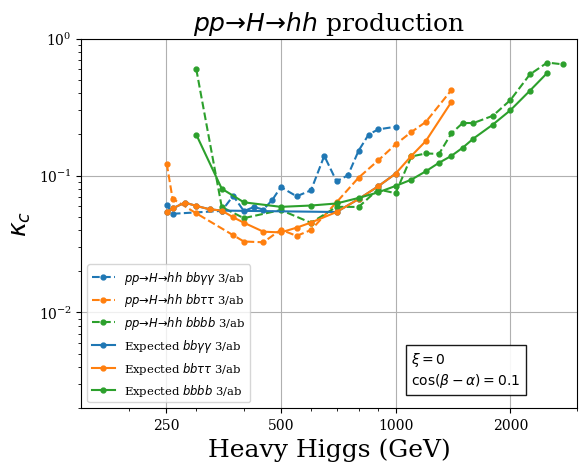

In [58]:
os.chdir('/gpfs/home/argiannakopo/SFV/DownType_csv_PW/Hhh_downtype')
#Plot the mass Vs kc
matplotlib.rcParams['font.family']='serif'
#matplotlib.rcParams['text.usetex'] = True
ax = plt.gca()
# ax.plot(final_bound_gaga['m'],final_bound_gaga['kc'], marker='.', markersize='7',color='C0', label=r'$pp \to H \to hh$ $bb\gamma \gamma$ from 2112.11876')#, label='H -> hh') #, c = 'blue')
# ax.plot(final_bound_tata['m'],final_bound_tata['kc'], marker='.', markersize='7',color='C1', label=r'$pp \to H \to hh$ $bb\tau \tau$ from 2209.10910')#, label='H -> hh') #, c = 'blue')
# ax.plot(final_bound_bb['m'],final_bound_bb['kc'], marker='.', markersize='7',color='C2', label=r'$pp \to H \to hh$ $bbbb$ from 2202.07288')#, label='H -> hh') #, c = 'blue')

ax.plot(rescaled_gaga['m'],rescaled_gaga['kc'], marker='.',linestyle='--', markersize='7',color='C0', label=r'$pp \to H \to hh$ $bb\gamma \gamma$ 3/ab')#, label='H -> hh') #, c = 'blue')
ax.plot(rescaled_tata['m'],rescaled_tata['kc'], marker='.',linestyle='--', markersize='7',color='C1', label=r'$pp \to H \to hh$ $bb\tau \tau$ 3/ab')#, label='H -> hh') #, c = 'blue')
ax.plot(rescaled_bb['m'],rescaled_bb['kc'], marker='.',linestyle='--' ,markersize='7',color='C2', label=r'$pp \to H \to hh$ $bbbb$ 3/ab')#, label='H -> hh') #, c = 'blue')

ax.plot(exp_rescaled_gaga['m'],exp_rescaled_gaga['kc'], marker='.',linestyle='solid', markersize='7',color='C0', label=r'Expected $bb\gamma \gamma$ 3/ab')
ax.plot(exp_rescaled_tata['m'],exp_rescaled_tata['kc'], marker='.',linestyle='solid', markersize='7',color='C1', label=r'Expected $bb\tau \tau$ 3/ab')
ax.plot(exp_rescaled_bb['m'],exp_rescaled_bb['kc'], marker='.',linestyle='solid' ,markersize='7',color='C2', label=r'Expected $bbbb$ 3/ab')


ax.set_yscale('log')
ax.set_xscale('log')
plt.axis([150,3000,0.002,1])
#ax.set_xlim(200,3000)
#ax.set_ylim(0.05,1.5)
ax.set_xticks([250,500,1000,2000], labels=[250,500,1000,2000])
#ax.set_ytickc([0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5], labels=[0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5])
ax.set_xlabel('Heavy Higgs (GeV)', fontsize=18)
ax.set_ylabel('$\kappa_c$',fontsize=18)
#plt.axvline(x=300)
plt.grid()
#plt.ylim([0.0018,1])
plt.legend(fontsize='small')

plt.title(r'$pp \to H \to hh$ production ', fontsize=18)

text2 = r'$\xi=0$'
text4 = r'$\cos( \beta- \alpha)=0.1$'

text =  text2 +'\n'+ text4 
plt.text(1100, 3*10**(-3), text, fontsize=10, bbox=dict(facecolor='white', alpha=0.9))

# os.chdir('gpfs/home/argiannakopo/SFV/UpType_csv_PW/AZh,uptype')
# plt.savefig("AZh_channel_up_kc.pdf", format="pdf", bbox_inches="tight")